In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class equalizing_diff:
    """
    A class of the equalizing difference model
    """
    
    def __init__(self, R, T, γ_h, γ_c, w_h0, D=0, π=None):
        # one switches to the weak model by setting π
        self.R, self.γ_h, self.γ_c, self.w_h0, self.D = R, γ_h, γ_c, w_h0, D
        self.T, self.π = T, π
    
    def compute_gap(self):
        R, γ_h, γ_c, w_h0, D = self.R, self.γ_h, self.γ_c, self.w_h0, self.D
        T, π = self.T, self.π
        
        A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
        A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4
        
        # tweaked model
        if π!=None:
            A_c = π*A_c 
        
        ϕ = A_h/A_c + D/(w_h0*A_c)
        return ϕ

In [3]:
# ϕ_R
def ϕ_R(mc, R_new):
    mc_new = equalizing_diff(R_new, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_R = np.vectorize(ϕ_R)

# ϕ_γh
def ϕ_γh(mc, γh_new):
    mc_new = equalizing_diff(mc.R, mc.T, γh_new, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γh = np.vectorize(ϕ_γh)

# ϕ_γc
def ϕ_γc(mc, γc_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, γc_new, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γc = np.vectorize(ϕ_γc)

# ϕ_π
def ϕ_π(mc, π_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, π_new)
    return mc_new.compute_gap()

ϕ_π = np.vectorize(ϕ_π)

In [4]:
# set benchmark parameters
R = 1.05
T = 40
γ_h, γ_c = 1.01, 1.01
w_h0 = 1
D = 10

# create an instance
ex1 = equalizing_diff(R=R, T=T, γ_h=γ_h, γ_c=γ_c, w_h0=w_h0, D=D)
gap1 = ex1.compute_gap()

print(gap1)

1.8041412724969135


In [5]:
# free college
ex2 = equalizing_diff(R, T, γ_h, γ_c, w_h0, D=0)
gap2 = ex2.compute_gap()
print(gap2)

1.2204649517903732


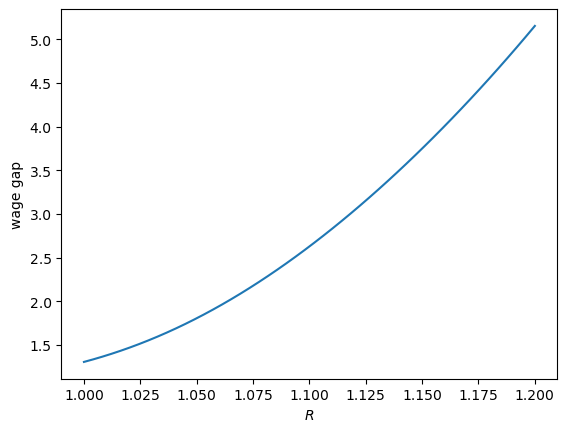

In [6]:
R_arr = np.linspace(1, 1.2, 50)
plt.plot(R_arr, φ_R(ex1, R_arr))
plt.xlabel(r'$R$')
plt.ylabel(r'wage gap')
plt.show()

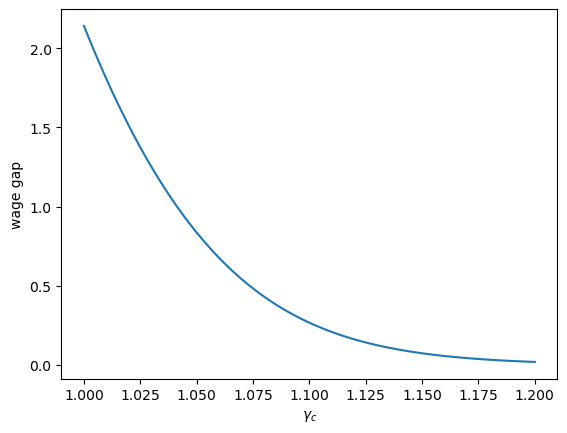

In [7]:
γc_arr = np.linspace(1, 1.2, 50)
plt.plot(γc_arr, φ_γc(ex1, γc_arr))
plt.xlabel(r'$\gamma_c$')
plt.ylabel(r'wage gap')
plt.show()

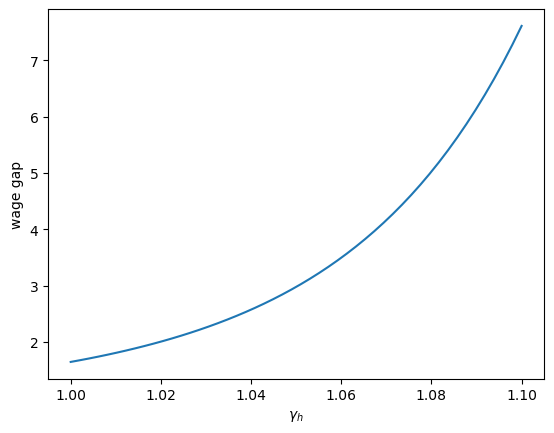

In [8]:
γh_arr = np.linspace(1, 1.1, 50)
plt.plot(γh_arr, φ_γh(ex1, γh_arr))
plt.xlabel(r'$\gamma_h$')
plt.ylabel(r'wage gap')
plt.show()

In [9]:
# a model of enterpreneur
ex3 = equalizing_diff(R, T, γ_h, γ_c, w_h0, π=0.2)
gap3 = ex3.compute_gap()

print(gap3)

6.102324758951866


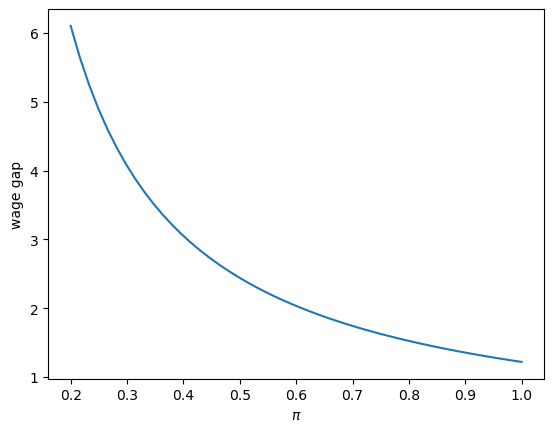

In [10]:
π_arr = np.linspace(0.2, 1, 50)
plt.plot(π_arr, φ_π(ex3, π_arr))
plt.ylabel(r'wage gap')
plt.xlabel(r'$\pi$')
plt.show()

In [11]:
from sympy import Symbol, Lambda, symbols, refine, \
                  Sum, simplify, Eq, solve, Lambda, lambdify

# Define the symbols
R, w_h0, w_c0, γ_c, γ_h, ϕ, D, t, T = symbols(
    'R w^h_0 w^c_0 gamma_c gamma_h phi D t T', positive=True)

refine(γ_c, γ_c>1)
refine(γ_h, γ_h>1)
refine(R, R>1)

# Define the wage for college 
# and high school graduates at time t
w_ct = w_c0 * γ_c**t
w_ht = w_h0 * γ_h**t

In [12]:
w_ct

gamma_c**t*w^c_0

In [13]:
w_ht

gamma_h**t*w^h_0

In [14]:
PV_college = Sum(R**-t * w_ct, (t, 4, T))
PV_college

Sum(gamma_c**t*w^c_0/R**t, (t, 4, T))

In [15]:
PV_highschool = Sum(R**-t * w_ht, (t, 0, T))
PV_highschool

Sum(gamma_h**t*w^h_0/R**t, (t, 0, T))

In [16]:
A_h = simplify(PV_highschool.doit() / w_h0)
A_h

Piecewise((T + 1, Eq(gamma_h/R, 1)), ((R**(T + 1) - gamma_h**(T + 1))/(R**T*(R - gamma_h)), True))

In [17]:
A_c = simplify(PV_college.doit() / w_c0)
A_c

Piecewise((T - 3, Eq(gamma_c/R, 1)), (R**(-T - 4)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)/(R - gamma_c), True))

In [18]:
A_h = simplify(A_h.args[1][0])
A_c = simplify(A_c.args[1][0])

In [19]:
A_h

(R**(T + 1) - gamma_h**(T + 1))/(R**T*(R - gamma_h))

In [20]:
A_c

R**(-T - 4)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)/(R - gamma_c)

In [21]:
ϕ = A_h/A_c + D/(w_h0*A_c)
ϕ

D*R**(T + 4)*(R - gamma_c)/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) + R**(T + 4)*(R - gamma_c)*(R**(T + 1) - gamma_h**(T + 1))/(R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4))

In [22]:
R_value = 1.05
T_value = 40
γ_h_value, γ_c_value = 1.01, 1.01
w_h0_value = 1
D_value = 10

symbol_subs = {D: D_value,
               γ_h: γ_h_value,
               γ_c: γ_c_value,
               R: R_value,
               T: T_value,
               w_h0: w_h0_value}

In [23]:
ϕ_D, ϕ_T, ϕ_γ_h, ϕ_γ_c, ϕ_R = (ϕ.diff(D), ϕ.diff(T), 
                               ϕ.diff(γ_h), ϕ.diff(γ_c), 
                               ϕ.diff(R))

In [24]:
grid = np.meshgrid(np.arange(10, 60, 1), 
                   np.arange(0, 60, 1))

ϕ_TD = ϕ.subs({γ_h: γ_h_value,
               γ_c: γ_c_value,
               R: R_value,
               w_h0: w_h0_value})

In [25]:
ϕ_TD_lambda = lambdify([T, D], ϕ_TD)

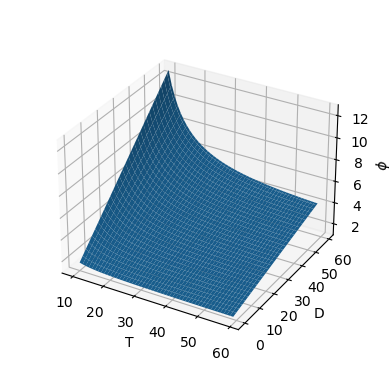

In [26]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)

ax.plot_surface(grid[0], 
                grid[1],
                ϕ_TD_lambda(grid[0], grid[1]))
                
ax.set_xlabel('T')
ax.set_ylabel('D')
ax.set_zlabel(r'$\phi$')
plt.show()

In [27]:
ϕ_D

R**(T + 4)*(R - gamma_c)/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4))

In [28]:
ϕ_D.subs(symbol_subs)

0.0583676320706540

In [29]:
ϕ_T

D*R**(T + 4)*(R - gamma_c)*log(R)/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) + D*R**(T + 4)*(R - gamma_c)*(R**4*gamma_c**(T + 1)*log(gamma_c) - R**(T + 1)*gamma_c**4*log(R))/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)**2) + R**(T + 4)*(R - gamma_c)*(R**(T + 1) - gamma_h**(T + 1))*(R**4*gamma_c**(T + 1)*log(gamma_c) - R**(T + 1)*gamma_c**4*log(R))/(R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)**2) + R**(T + 4)*(R - gamma_c)*(R**(T + 1)*log(R) - gamma_h**(T + 1)*log(gamma_h))/(R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4))

In [30]:
ϕ_T.subs(symbol_subs)

-0.00973478032996598

In [31]:
ϕ_γ_h

R**(T + 4)*(R - gamma_c)*(R**(T + 1) - gamma_h**(T + 1))/(R**T*(R - gamma_h)**2*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) - R**(T + 4)*gamma_h**(T + 1)*(R - gamma_c)*(T + 1)/(R**T*gamma_h*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4))

In [32]:
ϕ_γ_h.subs(symbol_subs)

17.8590485545256

In [33]:
ϕ_γ_c

D*R**(T + 4)*(R - gamma_c)*(R**4*gamma_c**(T + 1)*(T + 1)/gamma_c - 4*R**(T + 1)*gamma_c**3)/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)**2) - D*R**(T + 4)/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) + R**(T + 4)*(R - gamma_c)*(R**(T + 1) - gamma_h**(T + 1))*(R**4*gamma_c**(T + 1)*(T + 1)/gamma_c - 4*R**(T + 1)*gamma_c**3)/(R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)**2) - R**(T + 4)*(R**(T + 1) - gamma_h**(T + 1))/(R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4))

In [34]:
ϕ_γ_c.subs(symbol_subs)

-31.6486401973376

In [35]:
ϕ_R

D*R**(T + 4)*(R - gamma_c)*(4*R**3*gamma_c**(T + 1) - R**(T + 1)*gamma_c**4*(T + 1)/R)/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)**2) + D*R**(T + 4)/(w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) + D*R**(T + 4)*(R - gamma_c)*(T + 4)/(R*w^h_0*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) + R**(T + 4)*(R - gamma_c)*(R**(T + 1) - gamma_h**(T + 1))*(4*R**3*gamma_c**(T + 1) - R**(T + 1)*gamma_c**4*(T + 1)/R)/(R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)**2) - R**(T + 4)*(R - gamma_c)*(R**(T + 1) - gamma_h**(T + 1))/(R**T*(R - gamma_h)**2*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) + R**(T + 4)*(R**(T + 1) - gamma_h**(T + 1))/(R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) + R**(T + 1)*R**(T + 4)*(R - gamma_c)*(T + 1)/(R*R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c**4)) - R**(T + 4)*T*(R - gamma_c)*(R**(T + 1) - gamma_h**(T + 1))/(R*R**T*(R - gamma_h)*(-R**4*gamma_c**(T + 1) + R**(T + 1)*gamma_c*

In [36]:
ϕ_R.subs(symbol_subs)

13.2642738659430